Smoothing Method

Simple Exponential Smoothing

In [18]:
import os
import numpy as np
import pandas as pd
import math
import matplotlib.pyplot as plt
from statsmodels.tsa.api import ExponentialSmoothing, SimpleExpSmoothing
from sklearn.metrics import mean_squared_error, mean_absolute_error

Open 2024 Data

In [9]:
df_2024 = pd.read_csv(r"C:\Users\Ayu Permata HM\Desktop\sds-term6-cpf\data\2024_Stats_cleaned.csv")
df_2024

print(df_2024.columns)

print(df_2024.index)

Index(['Date', 'Open Balances', 'Closed', 'New Cases'], dtype='object')
RangeIndex(start=0, stop=85, step=1)


In [10]:
df_2024.set_index('Date', inplace=True)

train_data, test_data = df_2024[0:int(len(df_2024)*0.7)], df_2024[int(len(df_2024)*0.3):]

train_open = train_data['Open Balances']
test_open = test_data['Open Balances']

Exponential Smoothing

c:\Users\Ayu Permata HM\AppData\Local\Programs\Python\Python312\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)


2024-02-29    2590.331004
2024-03-01    2590.331004
2024-03-02    2590.331004
2024-03-03    2590.331004
2024-03-04    2590.331004
2024-03-05    2590.331004
2024-03-06    2590.331004
2024-03-07    2590.331004
2024-03-08    2590.331004
2024-03-09    2590.331004
2024-03-10    2590.331004
2024-03-11    2590.331004
2024-03-12    2590.331004
2024-03-13    2590.331004
2024-03-14    2590.331004
2024-03-15    2590.331004
2024-03-16    2590.331004
2024-03-17    2590.331004
2024-03-18    2590.331004
2024-03-19    2590.331004
2024-03-20    2590.331004
2024-03-21    2590.331004
2024-03-22    2590.331004
2024-03-23    2590.331004
2024-03-24    2590.331004
2024-03-25    2590.331004
2024-03-26    2590.331004
2024-03-27    2590.331004
2024-03-28    2590.331004
2024-03-29    2590.331004
2024-03-30    2590.331004
2024-03-31    2590.331004
2024-04-01    2590.331004
2024-04-02    2590.331004
2024-04-03    2590.331004
2024-04-04    2590.331004
2024-04-05    2590.331004
2024-04-06    2590.331004
2024-04-07  

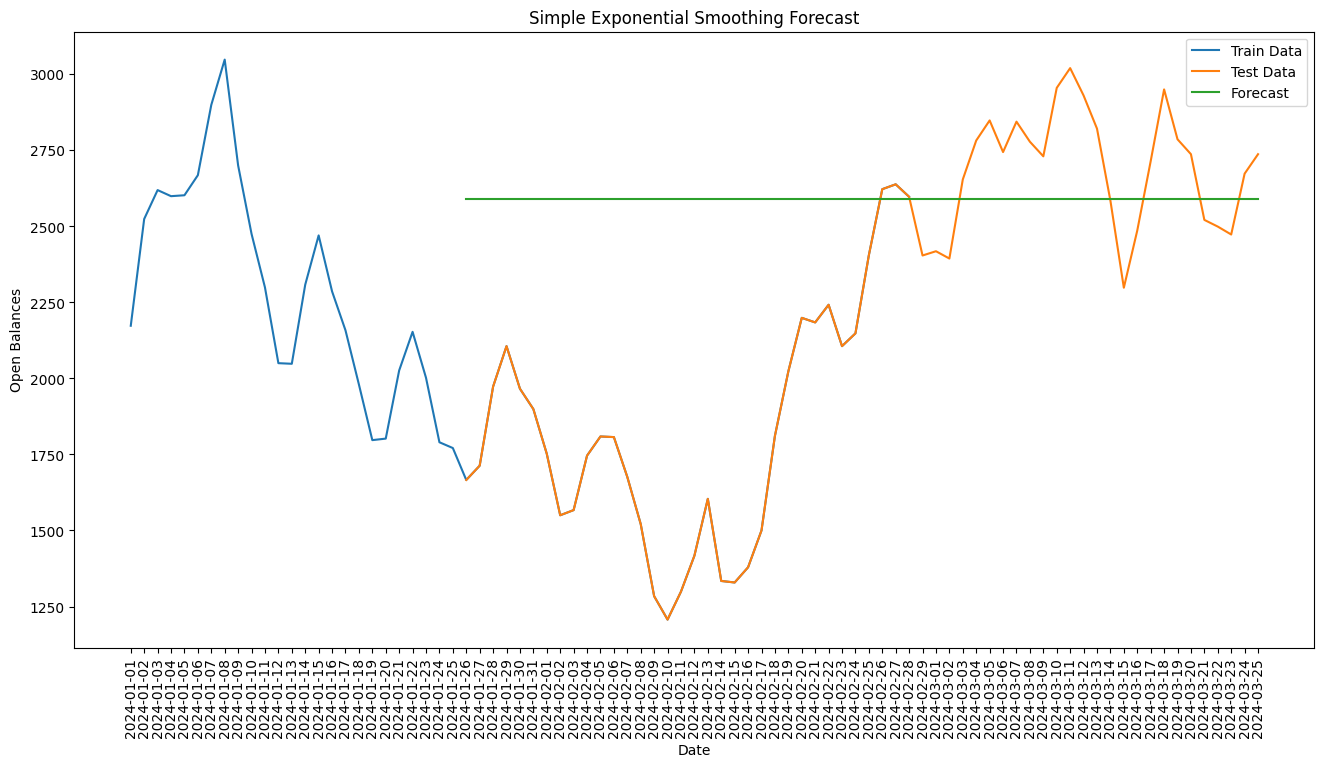

In [23]:
# Adjusting smoothing level
smoothing_level = 0.6  # Adjust this value as needed

# Train the exponential smoothing model with adjusted smoothing level
model = SimpleExpSmoothing(train_open).fit(smoothing_level=smoothing_level, optimized = False)

# Forecast using the trained model
forecast_ses = model.forecast(len(test_open))

print(forecast_ses)

# Plotting the actual vs. forecasted values
plt.figure(figsize=(16,8))
plt.plot(train_open.index, train_open, label='Train Data')
plt.plot(test_open.index, test_open, label='Test Data')
plt.plot(test_open.index, forecast_ses, label='Forecast')
plt.xlabel('Date')
plt.xticks(rotation=90)
plt.ylabel('Open Balances')
plt.title('Simple Exponential Smoothing Forecast')
plt.legend()
plt.show()

c:\Users\Ayu Permata HM\AppData\Local\Programs\Python\Python312\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)


2024-02-29    2098.266001
2024-03-01    2098.266001
2024-03-02    2098.266001
2024-03-03    2098.266001
2024-03-04    2098.266001
2024-03-05    2098.266001
2024-03-06    2098.266001
2024-03-07    2098.266001
2024-03-08    2098.266001
2024-03-09    2098.266001
2024-03-10    2098.266001
2024-03-11    2098.266001
2024-03-12    2098.266001
2024-03-13    2098.266001
2024-03-14    2098.266001
2024-03-15    2098.266001
2024-03-16    2098.266001
2024-03-17    2098.266001
2024-03-18    2098.266001
2024-03-19    2098.266001
2024-03-20    2098.266001
2024-03-21    2098.266001
2024-03-22    2098.266001
2024-03-23    2098.266001
2024-03-24    2098.266001
2024-03-25    2098.266001
2024-03-26    2098.266001
2024-03-27    2098.266001
2024-03-28    2098.266001
2024-03-29    2098.266001
2024-03-30    2098.266001
2024-03-31    2098.266001
2024-04-01    2098.266001
2024-04-02    2098.266001
2024-04-03    2098.266001
2024-04-04    2098.266001
2024-04-05    2098.266001
2024-04-06    2098.266001
2024-04-07  

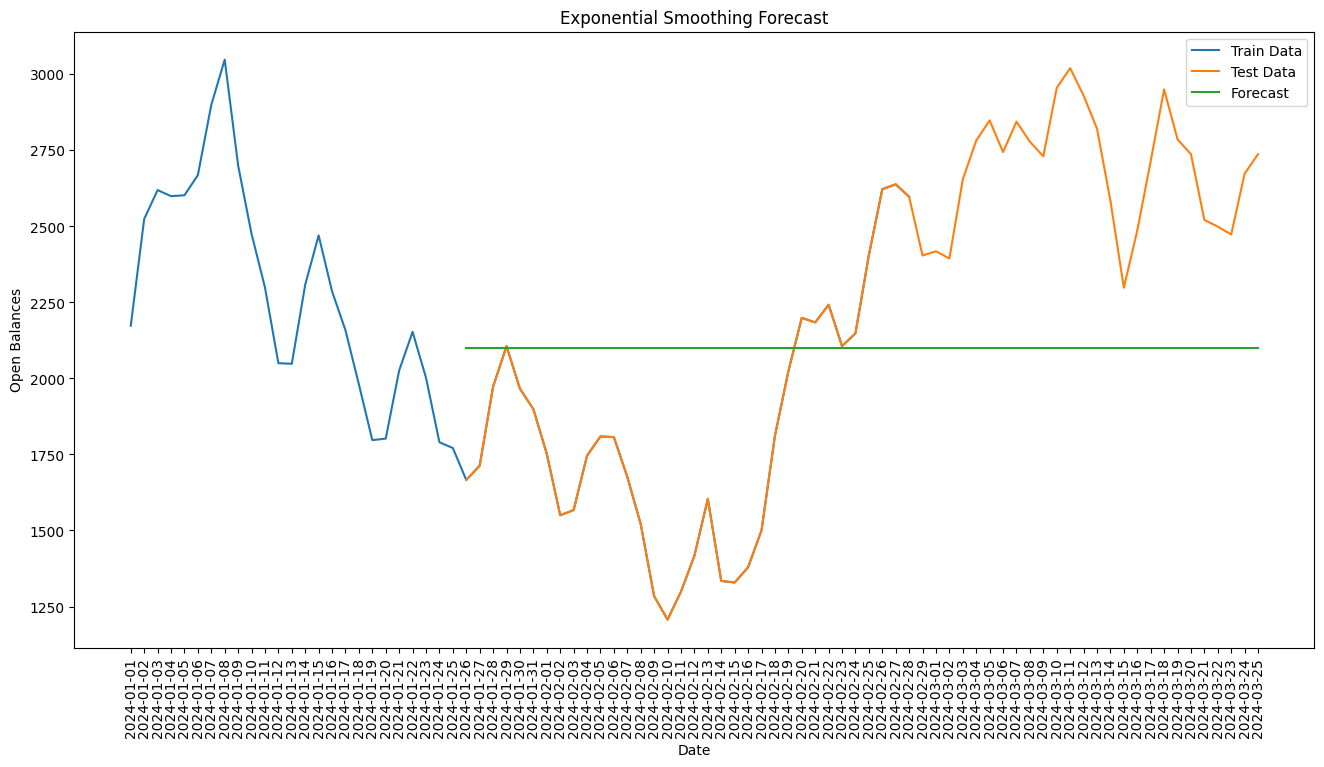

In [26]:
# Adjusting smoothing level
smoothing_level = 0.1 # Adjust this value as needed

# Define initialization method
initialization_method = 'heuristic'  # Options: 'estimated', 'heuristic', 'legacy-heuristic', 'known'

# Train the exponential smoothing model with adjusted smoothing level and initialization method
model = ExponentialSmoothing(train_open, initialization_method=initialization_method).fit(smoothing_level=smoothing_level, optimized = False)

# Forecast using the trained model
forecast_es = model.forecast(len(test_open))

print(forecast_es)

# Plotting the actual vs. forecasted values
plt.figure(figsize=(16,8))
plt.plot(train_open.index, train_open, label='Train Data')
plt.plot(test_open.index, test_open, label='Test Data')
plt.plot(test_open.index, forecast_es, label='Forecast')
plt.xlabel('Date')
plt.ylabel('Open Balances')
plt.xticks(rotation=90)
plt.title('Exponential Smoothing Forecast')
plt.legend()
plt.show()

In [27]:
# Report performance for ES
mse = mean_squared_error(test_open, forecast_es)
print('MSE ES:', mse)
mae = mean_absolute_error(test_open, forecast_es)
print('MAE ES:', mae)
rmse = math.sqrt(mean_squared_error(test_open, forecast_es))
print('RMSE ES:', rmse)

# Report performance for ES
mse = mean_squared_error(test_open, forecast_ses)
print('MSE SES:', mse)
mae = mean_absolute_error(test_open, forecast_ses)
print('MAE SES:', mae)
rmse = math.sqrt(mean_squared_error(test_open, forecast_ses))
print('RMSE SES:', rmse)

MSE ES: 294857.5400455745
MAE ES: 483.59679975473034
RMSE ES: 543.0078637050982
MSE SES: 439178.731889634
MAE SES: 517.7936680653
RMSE SES: 662.7056148016508
